In [6]:
!pip install --user networkx matplotlib


  Using cached matplotlib-3.8.1-cp310-cp310-win_amd64.whl (7.6 MB)


In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

Best path: 5


TypeError: object of type 'numpy.int64' has no len()

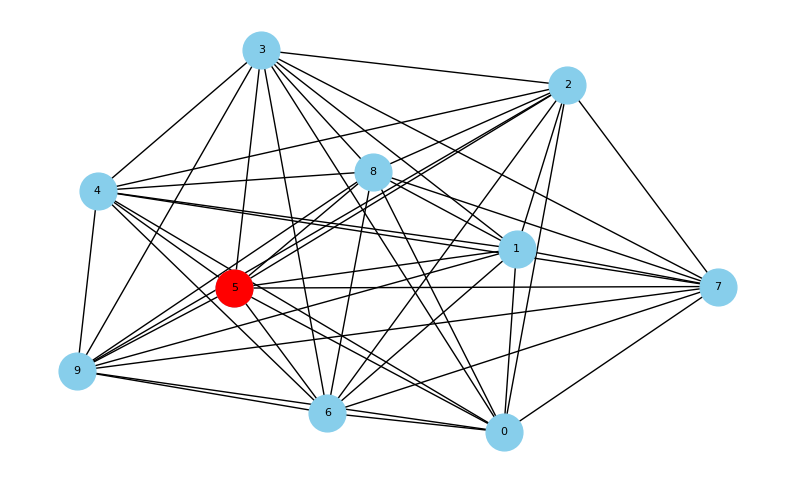

In [17]:
best_path = np.argmax(pheromone.sum(axis=1))
print("Best path:", best_path)

# Visualize the graph and the best path
G = nx.Graph()
G.add_nodes_from(range(len(graph)))

for i in range(len(graph)):
    for j in range(len(graph)):
        if i != j:
            G.add_edge(i, j, weight=graph[i, j])

pos = nx.spring_layout(G)  # Define node positions for better visualization

# Explicitly create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Draw nodes
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", ax=ax)

# Highlight the best path nodes with red color
nx.draw_networkx_nodes(G, pos, nodelist=[best_path], node_color='red', node_size=700)

# Convert numpy.int64 to regular Python integers for best_path_edges
best_path_edges = [(int(best_path[i]), int(best_path[i + 1])) for i in range(len(best_path) - 1)]

# Highlight the best path edges with red color
nx.draw_networkx_edges(G, pos, edgelist=best_path_edges, edge_color='red', width=2, ax=ax)

# Add labels with directions on edges
labels = {}
for i, j in G.edges():
    labels[(i, j)] = f"{graph[i, j]:.2f} + {0.1 * traffic_data[i, j]:.2f}"  # Display both distance and traffic data

nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='green', font_size=8)

plt.title('Ant Colony Optimization - Best Path')
plt.show()